In [25]:
import pandas as pd
from tqdm import tqdm

In [21]:
data_2020_q1_path = "D:\\qing_research\\1_rainfall_water\\1_rainfall_water_network\\data\\Anglian_water\\Anglian Water data\\TSD\\2020-Q1\\2020-Q1.csv"
data_2020_q1_output = "D:\\qing_research\\1_rainfall_water\\1_rainfall_water_network\\data\\clean\\2020_Q1\\by_DMA"

In [6]:
data_2020_q1 = pd.read_csv(data_2020_q1_path)
data_2020_q1.head()

,Date/Time,DMA,DataSet,Flow(l/s)
0,2020-01-02 00:00:00.0000000,AABOTTMA,BNF,1.200000
1,2020-01-02 00:15:00.0000000,AABOTTMA,BNF,1.022222
2,2020-01-02 00:30:00.0000000,AABOTTMA,BNF,0.877778
3,2020-01-02 00:45:00.0000000,AABOTTMA,BNF,0.911111
4,2020-01-02 01:00:00.0000000,AABOTTMA,BNF,0.811111


In [7]:
data_2020_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589062 entries, 0 to 17589061
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   DMA        object 
 2   DataSet    object 
 3   Flow(l/s)  float64
dtypes: float64(1), object(3)
memory usage: 536.8+ MB


In [8]:
data_2020_q1.describe()

,Flow(l/s)
count,1.609942e+07
mean,4.703496e+02
std,1.573495e+06
min,-2.386092e+09
25%,1.222222e+00
50%,3.622222e+00
75%,8.066667e+00
max,2.386093e+09


In [9]:
data_2020_q1.isnull().sum()

Date/Time          0
DMA                0
DataSet            0
Flow(l/s)    1489637
dtype: int64

In [10]:
data_2020_q1['Date/Time'] = pd.to_datetime(data_2020_q1['Date/Time'])
data_2020_q1['Date/Time']

0          2020-01-02 00:00:00
1          2020-01-02 00:15:00
2          2020-01-02 00:30:00
3          2020-01-02 00:45:00
4          2020-01-02 01:00:00
                   ...        
17589057   2020-03-31 21:45:00
17589058   2020-03-31 22:00:00
17589059   2020-03-31 22:15:00
17589060   2020-03-31 22:30:00
17589061   2020-03-31 22:45:00
Name: Date/Time, Length: 17589062, dtype: datetime64[ns]

In [14]:
date_range = pd.date_range(start = '2020-01-02 00:00:00', end = '2020-03-31 22:45:00', freq = '15min')
date_range

DatetimeIndex(['2020-01-02 00:00:00', '2020-01-02 00:15:00',
               '2020-01-02 00:30:00', '2020-01-02 00:45:00',
               '2020-01-02 01:00:00', '2020-01-02 01:15:00',
               '2020-01-02 01:30:00', '2020-01-02 01:45:00',
               '2020-01-02 02:00:00', '2020-01-02 02:15:00',
               ...
               '2020-03-31 20:30:00', '2020-03-31 20:45:00',
               '2020-03-31 21:00:00', '2020-03-31 21:15:00',
               '2020-03-31 21:30:00', '2020-03-31 21:45:00',
               '2020-03-31 22:00:00', '2020-03-31 22:15:00',
               '2020-03-31 22:30:00', '2020-03-31 22:45:00'],
              dtype='datetime64[ns]', length=8636, freq='15min')

In [15]:
dma_dfs = {}

In [18]:
for dma, group in data_2020_q1.groupby('DMA'):
    group = group.set_index('Date/Time')
    group = group.reindex(date_range)
    group = group.reset_index().rename(columns={'index':'Date/Time'})
    dma_dfs[dma] = group.sort_values(by='Date/Time', ascending=True).reset_index(drop=True)

In [20]:
num_dmas = len(dma_dfs)
num_dmas

2030

In [26]:
with tqdm(total = num_dmas, desc = "saving") as progress_bar:
    for dma, df in dma_dfs.items():
        df.to_csv(f'{data_2020_q1_output}/{dma}.csv',index=False)
        progress_bar.update(1)

saving: 100%|██████████████████████████████████████████████████████████████████████| 2030/2030 [00:43<00:00, 46.23it/s]


In [27]:
data_2020_q1_AABOTTMA_path = "D:\\qing_research\\1_rainfall_water\\1_rainfall_water_network\\data\\clean\\2020_Q1\\by_DMA\\AABOTTMA.csv"

In [29]:
data_2020_q1_AABOTTMA = pd.read_csv(data_2020_q1_AABOTTMA_path)
data_2020_q1_AABOTTMA.isnull().sum()

Date/Time     0
DMA          16
DataSet      16
Flow(l/s)    20
dtype: int64

In [30]:
data_2020_q1_AABOTTMA.head()

,Date/Time,DMA,DataSet,Flow(l/s)
0,2020-01-02 00:00:00,AABOTTMA,BNF,1.200000
1,2020-01-02 00:15:00,AABOTTMA,BNF,1.022222
2,2020-01-02 00:30:00,AABOTTMA,BNF,0.877778
3,2020-01-02 00:45:00,AABOTTMA,BNF,0.911111
4,2020-01-02 01:00:00,AABOTTMA,BNF,0.811111


In [31]:
import matplotlib.pyplot as plt

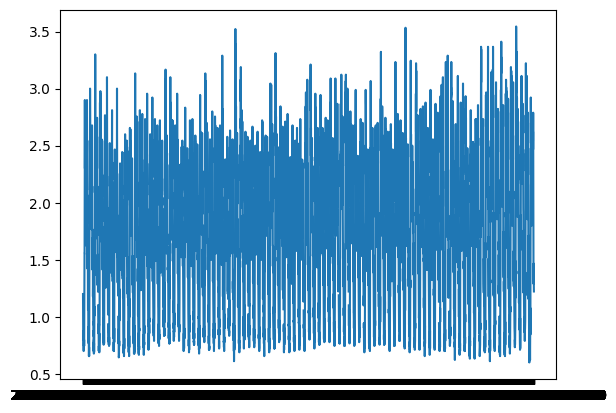

In [34]:
plt.plot(data_2020_q1_AABOTTMA['Date/Time'],data_2020_q1_AABOTTMA['Flow(l/s)'])
plt.show()